In [225]:
%pylab inline
import seaborn as sns
import numpy as np
import pandas as pd
import cPickle as pickle
from irm import cvpipelineutil
import sklearn.neighbors
import scipy.sparse
import irm
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [226]:
neurons_data = pickle.load(open("../data/mushroombody.neurondf.pickle", 'r'))
synapse_data = pickle.load(open("../data/mushroombody.synapsesdf.pickle", 'r'))
basicmat_data = pickle.load(open("../data/mushroombody.cleandata.pickle", 'r'))



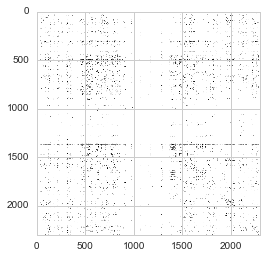

In [227]:
bin_mat = (basicmat_data['synapse_con_mat'] > 0).astype(np.uint8)
pylab.imshow(bin_mat, cmap=pylab.cm.Greys)

In [228]:
tbar_df = synapse_data['tbar_df']
connections_df = synapse_data['connections_df']
neurons_df = neurons_data['neurondf']

In [229]:
connections_df.head()

body ID  confidence flagged  loc_x  loc_y  loc_z  tbar_id traced  \
0    1730395         1.0   False   2528   6160   2486        0   True   
1    2165676         1.0   False   2533   6169   2493        0   True   
2    2530770         0.5    True   2554   6214   2522        1   True   
3      54977         1.0   False   2552   6231   2536        1   True   
4  400643001         1.0    True   2544   6267   2536        1   True   

           user  
0  manual-proof  
1  manual-proof  
2  manual-proof  
3  manual-proof  
4  manual-proof

In [230]:
dfmerged = pd.merge( connections_df, tbar_df, left_on='tbar_id', right_on='id', suffixes=('_post', '_pre'))
dfmerged.head()


body ID_post  confidence_post flagged_post  loc_x_post  loc_y_post  \
0       1730395              1.0        False        2528        6160   
1       2165676              1.0        False        2533        6169   
2       2530770              0.5         True        2554        6214   
3         54977              1.0        False        2552        6231   
4     400643001              1.0         True        2544        6267   

   loc_z_post  tbar_id traced     user_post  body ID_pre  confidence_pre  \
0        2486        0   True  manual-proof      1787089             0.5   
1        2493        0   True  manual-proof      1787089             0.5   
2        2522        1   True  manual-proof      1787089             1.0   
3        2536        1   True  manual-proof      1787089             1.0   
4        2536        1   True  manual-proof      1787089             1.0   

   convergent flagged_pre  id  loc_x_pre  loc_y_pre  loc_z_pre multi status  \
0         NaN         NaN   0       2518       6168       2491   NaN  final   
1         NaN         NaN   0       2518       6168       2491   NaN  final   
2  convergent         NaN   1       2534       6229       2536   NaN  final   
3  convergent         NaN   1       2534       6229       2536   NaN  final   
4  convergent         NaN   1       2534       6229       2536   NaN  final   

       user_pre  
0  manual-proof  
1  manual-proof  
2  manual-proof  
3  manual-proof  
4  manual-proof

In [231]:
neuronsdf = neurons_df.set_index('body ID')

In [232]:
vc = dfmerged['body ID_post'].value_counts()
neuronsdf['post_syn_count'] = vc

In [233]:
neuronsdf.sort('post_syn_count', ascending=False).head(20)

/data/jonas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


assigned                         comment         name  \
body ID                                                            
10563           NaN  Please don't change the status    MBON-14-B   
54977           NaN  Please don't change the status    MBON-14-A   
616459          NaN  Please don't change the status      MBON-18   
3878341         NaN                     outside ROI    MBON-07-B   
3338684         NaN                        13958560    MBON-07-A   
2               NaN           May connect to 134224       MB-APL   
513414          NaN        connect to MB-APL(#6898)       MB-DPM   
3391197         NaN  Please don't change the status       MBON-X   
124367          NaN                             NaN    PPL1-06-R   
43752           NaN                             NaN    PPL1-06-L   
1661302         NaN  Please don't change the status    MBON-19-A   
149383611       NaN                            Beta     MBON-10?   
8196428         NaN                             NaN    PPL1-05-R   
9891156         NaN                             NaN    PPL1-05-L   
8101328         NaN  Please don't change the status    MBON-19-B   
1190582         NaN  Please don't change the status      MBON-06   
16562174        NaN         touch itself many times  PAM-unknown   
13719714        NaN                             NaN      PAM-sc6   
16018373        NaN                            APL?       Others   
15282447        NaN                             NaN       PAM-p1   

                     status        user   idx  post_syn_count  
body ID                                                        
10563             Finalized    lauchies    49         14509.0  
54977             Finalized   takemuras  1971         14252.0  
616459            Finalized    anicetor  2046         12499.0  
3878341              Traced   ogundeyio  1678         11394.0  
3338684              Traced   ogundeyio  1599         11180.0  
2                    Traced   ogundeyio   632          9723.0  
513414               Traced    anicetor  1894          6988.0  
3391197           Finalized    anicetor  1613          4056.0  
124367            Finalized   takemuras   222          3193.0  
43752             Finalized    anicetor  1785          2517.0  
1661302           Finalized    anicetor   557          1556.0  
149383611            Traced   ogundeyio   477          1070.0  
8196428           Finalized   takemuras  2347          1015.0  
9891156           Finalized   takemuras  2535           968.0  
8101328           Finalized  shinomiyaa  2327           787.0  
1190582              Traced   takemuras   170           718.0  
16562174   Partially Traced   ogundeyio   551           692.0  
13719714      Hard to trace   ogundeyio   339           423.0  
16018373             Traced  takemurasa   539           374.0  
15282447      Hard to trace  shinomiyaa   512           371.0

In [235]:
fig = pylab.figure(figsize=(14, 14))
mbon_14b_is_post = dfmerged[dfmerged['body ID_post'] == 10563]


In [236]:
print len(mbon_14b_is_post), "postsynaptic sites"
print len(np.unique(mbon_14b_is_post.tbar_id)), "unique t-bars"

14509 postsynaptic sites
14385 unique t-bars


In [237]:
postsyn_vector = np.zeros((len(mbon_14b_is_post), 3))
postsyn_vector[:, 0] = mbon_14b_is_post.loc_x_post
postsyn_vector[:, 1] = mbon_14b_is_post.loc_y_post
postsyn_vector[:, 2] = mbon_14b_is_post.loc_z_post


In [238]:
import sklearn.metrics
a = sklearn.metrics.pairwise.euclidean_distances(postsyn_vector)
row, col = np.triu_indices(a.shape[0], 1)
distances = a[row, col]
distances_sub = distances[distances < 100]

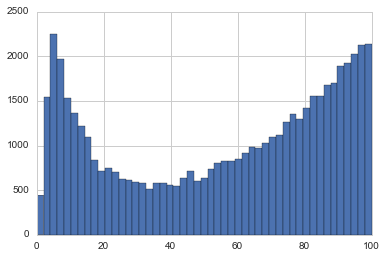

In [239]:
_ = pylab.hist(distances_sub, bins=np.linspace(0, 100, 50))

In [240]:
postsyn_perm = postsyn_vector.copy()
for i in range(3):
    postsyn_perm[:, i] = np.random.permutation(postsyn_perm[:,i])
a = sklearn.metrics.pairwise.euclidean_distances(postsyn_perm)
row, col = np.triu_indices(a.shape[0], 1)
distances = a[row, col]
distances_sub_perm = distances[distances < 100]


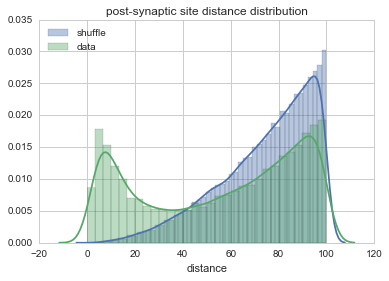

In [241]:
_ = sns.distplot(distances_sub_perm, label='shuffle')#, bins=np.linspace(0, 100, 50))
_ = sns.distplot(distances_sub, label='data')#, bins=np.linspace(0, 100, 50))
pylab.xlabel('distance')
pylab.title("post-synaptic site distance distribution")
pylab.legend(loc='upper left')


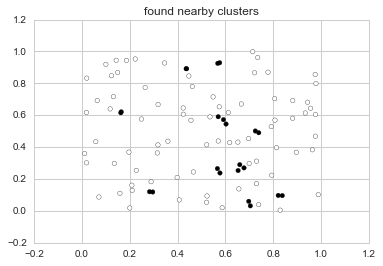

In [242]:
# sanity check that radius-neighbors-graph and connected components does what we want it to do 
np.random.seed(0)
p = np.random.uniform(0, 1, (100, 2))

n = sklearn.neighbors.radius_neighbors_graph(p, 0.03, include_self=True)
cc = scipy.sparse.csgraph.connected_components(n)[1]
c = np.zeros_like(cc)
for i in range(len(cc)):
    if np.sum(cc[i] == cc) > 1:
        c[i] = 1
    
pylab.scatter(p[:, 0], p[:, 1], c=c) 
pylab.title("found nearby clusters")

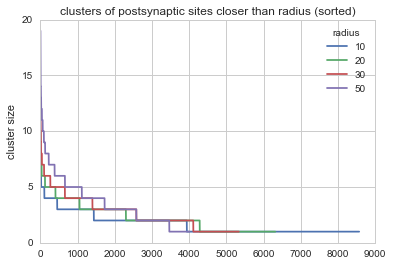

In [243]:
for thold in [10, 20, 30, 50]:
    n = sklearn.neighbors.radius_neighbors_graph(postsyn_vector, thold, include_self=True)
    cc = scipy.sparse.csgraph.connected_components(n)[1]
    pylab.plot(np.array(pd.value_counts(cc)), label=thold)

pylab.ylabel('cluster size')
pylab.title("clusters of postsynaptic sites closer than radius (sorted)")
pylab.legend(title="radius")

10563 MBON-14-B 6314
1190582 MBON-06 577
149383611 MBON-10? 557
1661302 MBON-19-A 931
2089450 MBON-11-R 108
3338684 MBON-07-A 5672
3391197 MBON-X 2184
3878341 MBON-07-B 5862
4834094 MBON-17-B-alpha prime 46
5189028 MBON-17-A-alpha prime 72
54977 MBON-14-A 6337
616459 MBON-18 6016
8101328 MBON-19-B 489
8862577 MBON-11-L 22


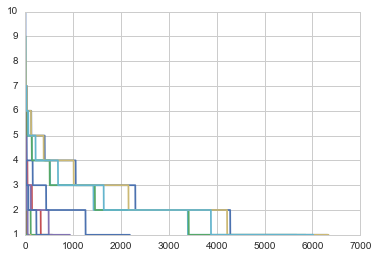

In [244]:
# let's do this for all MBON cells
neuronsdf['name_clean'] = neuronsdf.name.apply(lambda x: str(x))
a = []
for ni, n in neuronsdf[neuronsdf.name_clean.str[:4] == 'MBON'].iterrows():
    
    print ni, n.name_clean, 
    mbons_post = dfmerged[dfmerged['body ID_post'] == ni]
    postsyn_vector = np.zeros((len(mbons_post), 3))
    postsyn_vector[:, 0] = mbons_post.loc_x_post
    postsyn_vector[:, 1] = mbons_post.loc_y_post
    postsyn_vector[:, 2] = mbons_post.loc_z_post
    thold = 20
    ng = sklearn.neighbors.radius_neighbors_graph(postsyn_vector, thold, include_self=True)
    cc = scipy.sparse.csgraph.connected_components(ng)[1]
    unique = np.array(pd.value_counts(cc))
    pylab.plot(unique, label=n.name_clean)
    print len(unique)
    a.append(len(unique))

In [21]:
# restricted to kenyon cell inputs, 

kcs_df = neuronsdf[neuronsdf.name_clean.str.contains('KC')]
kcs_bodyids = kcs_df.index.values
# srini says only convergent-annotated synapses should be used
kcs_pre_df = dfmerged[(dfmerged['body ID_pre'].isin(kcs_bodyids)) & (dfmerged['convergent'] == 'convergent')]
res = []
rosette_res = []
for ni, n in neuronsdf[neuronsdf.name_clean.str[:4] == 'MBON'].iterrows():
    for thold in [10, 20, 30, 40]:
        mbons_post = kcs_pre_df[(kcs_pre_df['body ID_post'] == ni) ].copy()
        
        postsyn_vector = np.zeros((len(mbons_post), 3))
        postsyn_vector[:, 0] = mbons_post.loc_x_post
        postsyn_vector[:, 1] = mbons_post.loc_y_post
        postsyn_vector[:, 2] = mbons_post.loc_z_post
        ng = sklearn.neighbors.radius_neighbors_graph(postsyn_vector, thold, include_self=True)
        cc = scipy.sparse.csgraph.connected_components(ng)[1]
        #unique = np.array(pd.value_counts(cc))

        mbons_post['rosette'] = cc
        mbons_post['thold'] = thold
        mbons_post['post_name'] = n.name_clean
        mbons_post['body ID_post'] == ni
        rosette_res.append(mbons_post)
        a = pd.value_counts(pd.value_counts(cc))
        a.index.name = "cluster_size"
        d = pd.DataFrame(a).reset_index()
        d.columns = ['cluster_size', 'count']
        d['thold'] = thold
        d['post_name'] = n.name_clean
        d['body ID_post'] = ni

        res.append(d)
cluster_sizes = pd.concat(res)

# rosette sizes for each MBON
(convergent= True)

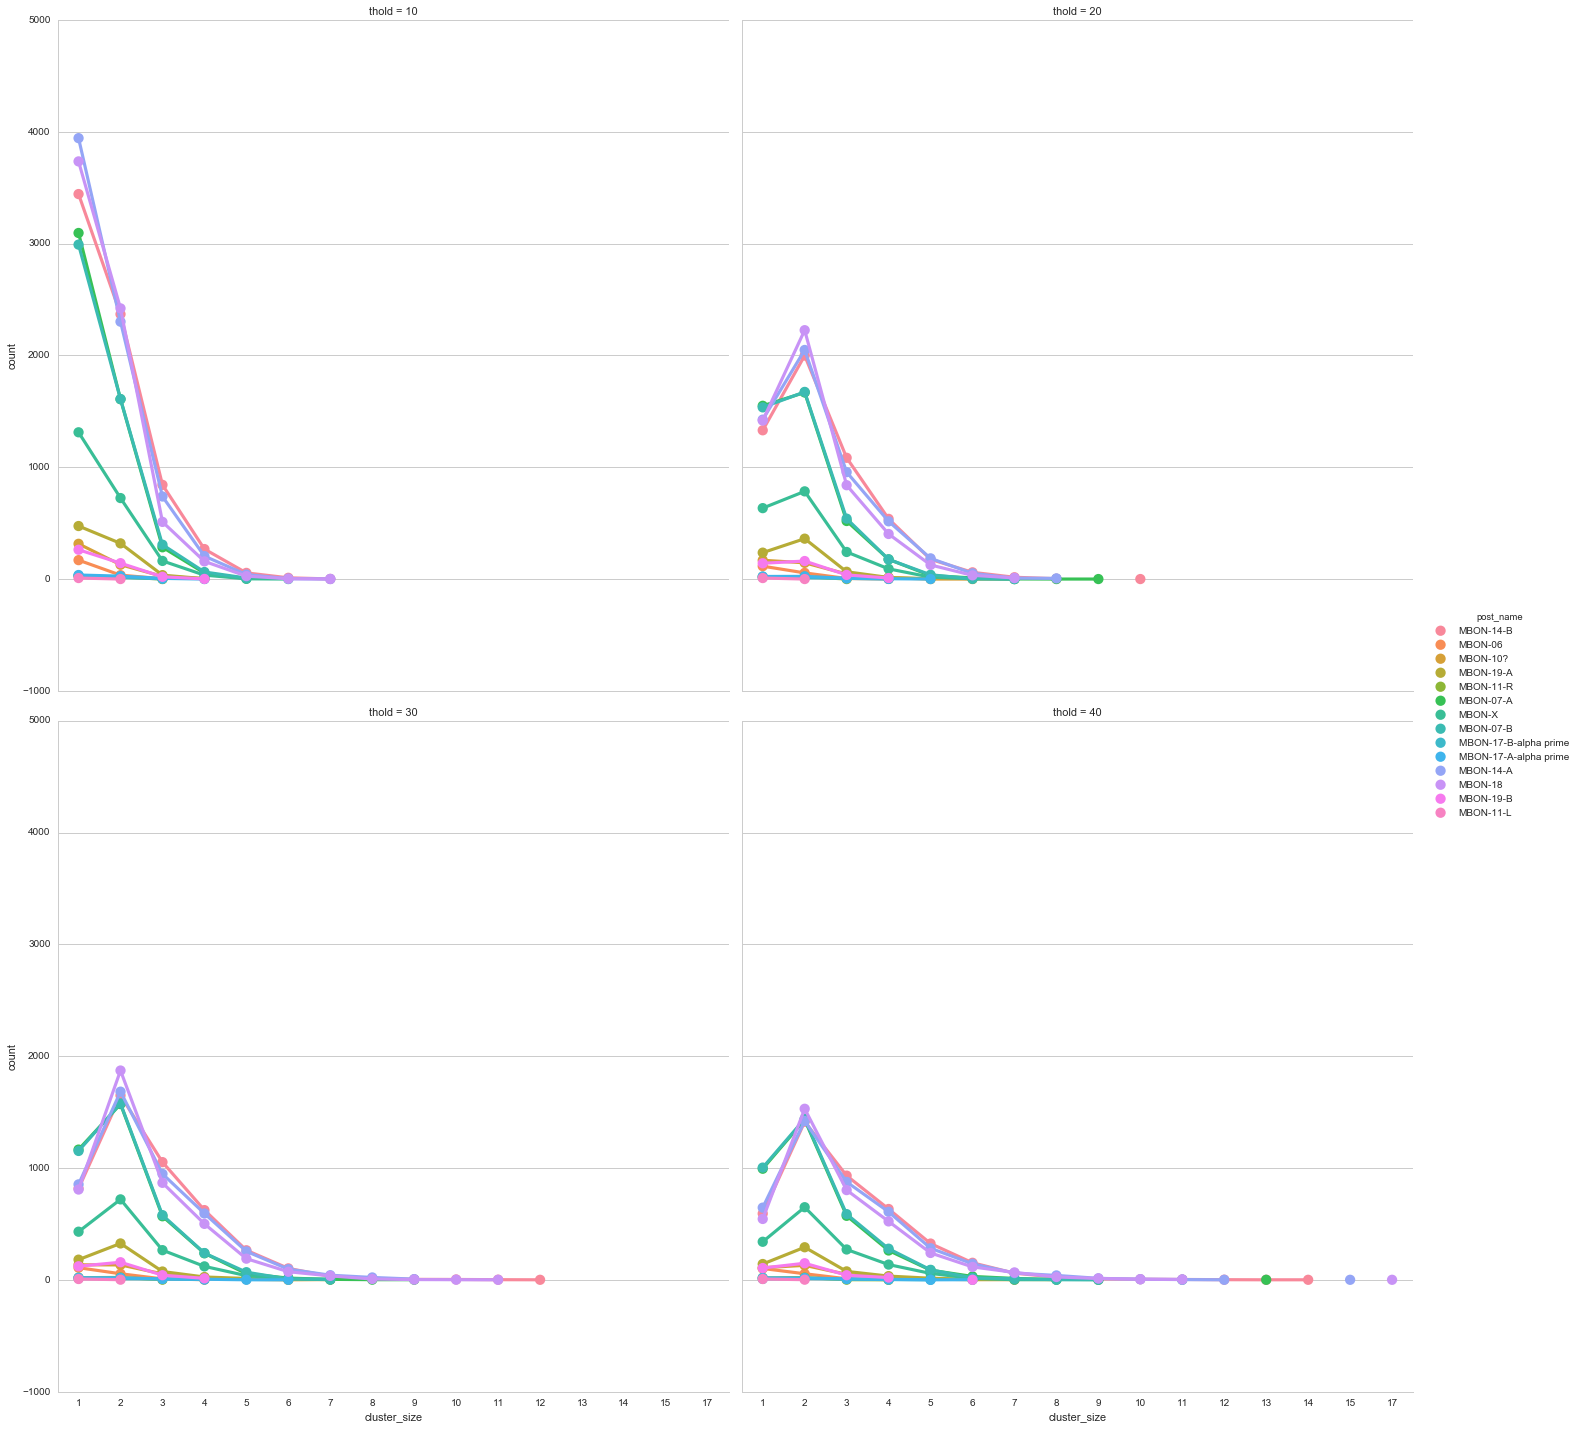

In [22]:
sns.factorplot(x='cluster_size', y='count', hue='post_name', col='thold', col_wrap=2, data=cluster_sizes, size=10)

# preprocessed KC->MBON rosettes

In [245]:
data = pickle.load(open("../data/mushroombody.KC-MBON.rosette.mats.pickle", 'r'))

In [253]:
thold_tgt = 30
d = data['mats'][thold_tgt]
data_mat=d['mat']

In [254]:
# what is the sparsity
sparsity_percent = data_mat.sum() / float(np.prod(data_mat.shape)) * 100
print "The source matrix is ", sparsity_percent, "% sparse"

The source matrix is  0.227075107818 % sparse


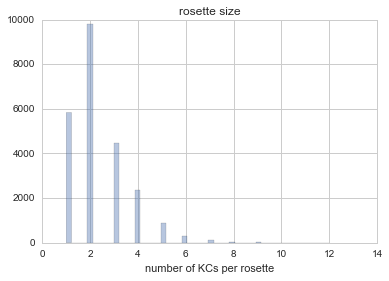

In [255]:
sns.distplot(data_mat.sum(axis=1), kde=False)
pylab.xlabel("number of KCs per rosette")
pylab.title("rosette size")

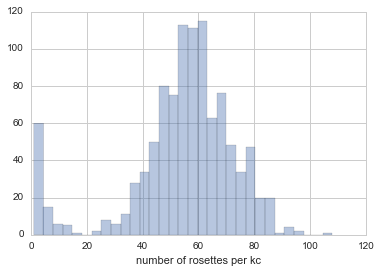

In [256]:
sns.distplot(data_mat.sum(axis=0), kde=False)
pylab.xlabel("number of rosettes per kc")

In [ ]:
# create a dataset of KCs, MBONs, and rosette-at-distance-threshold
